In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv('https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt', header = None)
data.columns = ['charge time','last']
data.describe()


,charge time,last
count,100.000000,100.000000
mean,4.573000,6.206800
std,2.788603,2.454116
min,0.000000,0.000000
25%,1.987500,3.975000
50%,4.375000,8.000000
75%,6.522500,8.000000
max,11.720000,8.000000


c:\users\linh le\desktop\profile\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


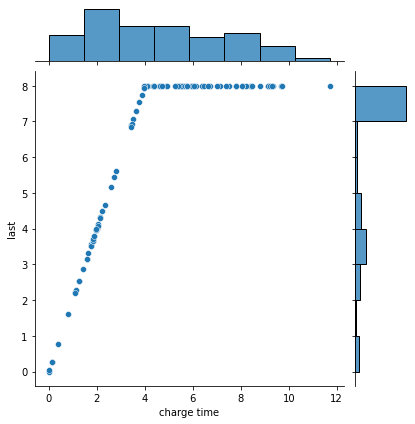

In [40]:
sns.jointplot(data['charge time'], data['last'])

In [41]:
charge_time = data['charge time'].to_numpy()
last_time = data['last'].to_numpy()

maxIndex=[]
feats=[]
for x in range(len(last_time)): #This loop returns a list of all indexes where laptop is fully charged
    if last_time[x]==8.0:
        maxIndex.append(x)

for idx in maxIndex:
    feats.append(charge_time[idx]) #Gets a list of all charge times resulting in fully charged laptop

min_c_time=min(feats) #This is the minimum charge time for the laptop to be fully charged
min_c_time

4.11

In [42]:
test = input()
linFeats=[]
idxlinFeats=[]
linTargets=[]
for idxFeat in range(len(charge_time)):
    feat=charge_time[idxFeat]
    if feat<min_c_time:
        linFeats.append(feat) #Returns a list of all linearly correlated values
        idxlinFeats.append(idxFeat) #Returns a list of all indexes of linearly correlated values
for idx in idxlinFeats:
    linTargets.append(last_time[idx]) #Returns a list of all linearly correlated targets
linFeats = np.array(linFeats)
linFeats = linFeats.reshape(-1,1)
linTargets = np.array(linFeats)
linTargets = linTargets.reshape(-1, 1)

In [43]:
linModel=LinearRegression()
linModel.fit(linFeats,linTargets)
prediction=linModel.predict(float(test))
prediction=prediction[0]
if prediction>8.0:
    prediction=8.0
print(prediction)


ValueError: Expected 2D array, got scalar array instead:
array=1.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.